# Linear Regression

Ref. Chapters 2 & 3 ISLR

Goal is to minimize the distance between points and line.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read in housing data
df = pd.read_csv('data/USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

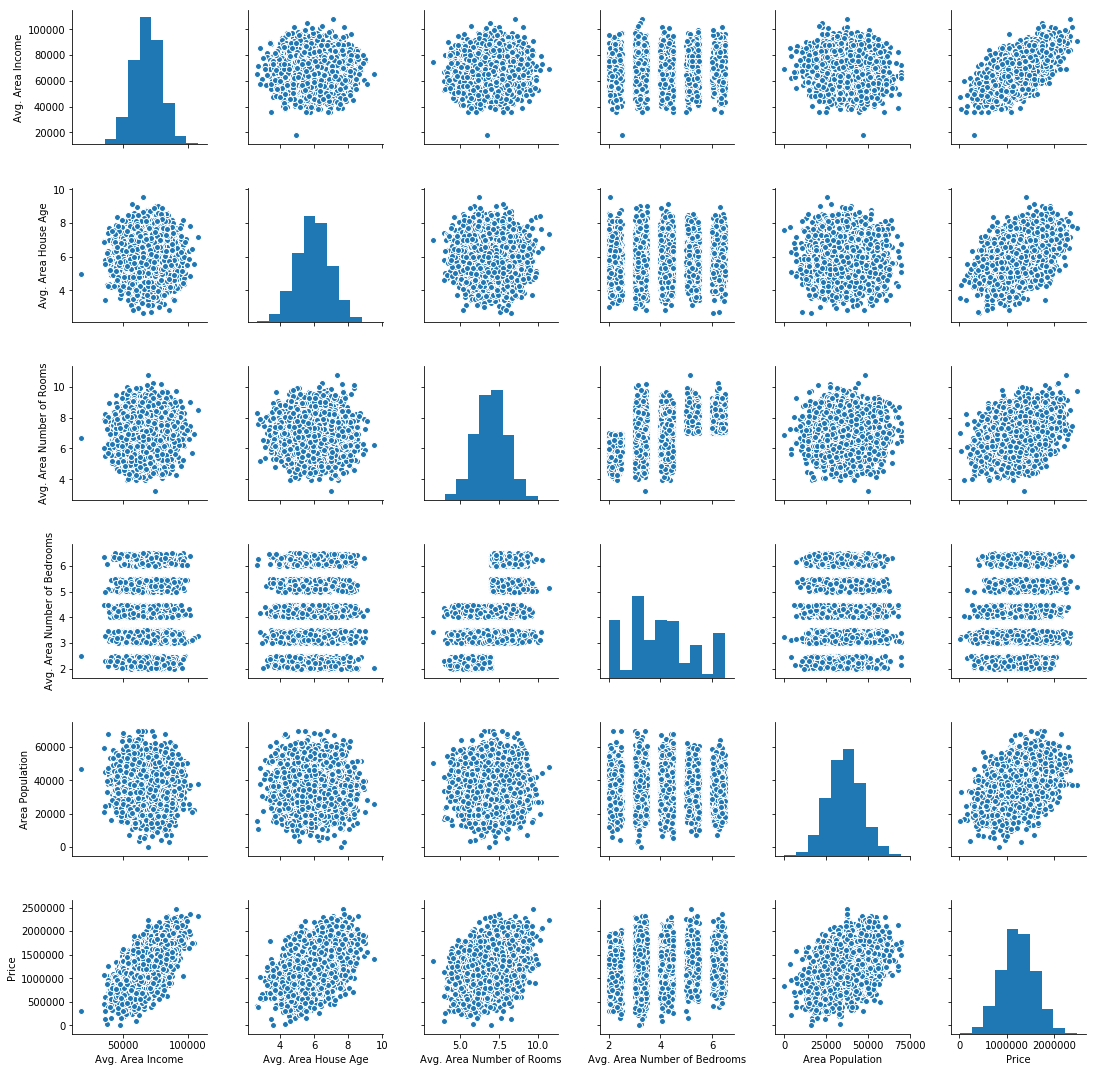

In [7]:
sns.pairplot(df)

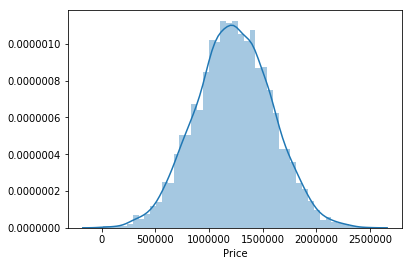

In [8]:
sns.distplot(df['Price'])

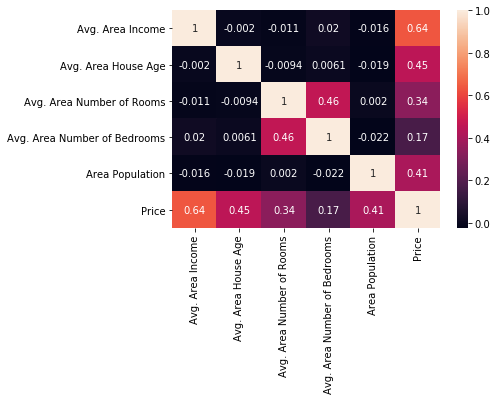

In [10]:
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [18]:
# assign columns names to x, removing text columns
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [19]:
# assign predictor to y
y = df['Price']

In [20]:
# import train test split to split data
from sklearn.cross_validation import train_test_split

In [21]:
# uses tuple unpacking to create x/y training and testing sets
# test_size determines size of test data relative to training
# random_state is used for reproduceability
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4, 
                                                    random_state=101
                                                   )

In [23]:
# import linear regression estimator
from sklearn.linear_model import LinearRegression

In [24]:
# instantiate
lm = LinearRegression()

In [25]:
# fit model to training data
lm.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# print the intercept
print(lm.intercept_)

-2640159.79685


In [27]:
# list coefficents
lm.coef_

array([  2.15282755e+01,   1.64883282e+05,   1.22368678e+05,
         2.23380186e+03,   1.51504200e+01])

In [28]:
# create a dataframe of coeficents and x labels
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [29]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### How to Interpret

If we hold all other features constant, a 1 unit increase in `Avg. Area Income` is associated with an increase of $21.53 in price.

## Predictions

In [34]:
# for predictions we a re passing in features that the model has never seen before
predictions = lm.predict(X_test)

In [35]:
predictions

array([ 1260960.70567625,   827588.75560352,  1742421.24254328, ...,
         372191.4062695 ,  1365217.15140894,  1914519.54178823])

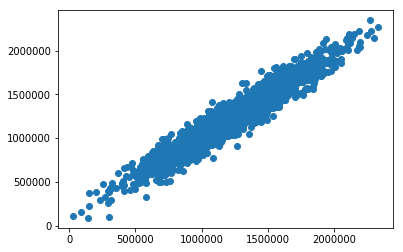

In [36]:
# visualize difference between predictions and true values
plt.scatter(y_test, predictions)

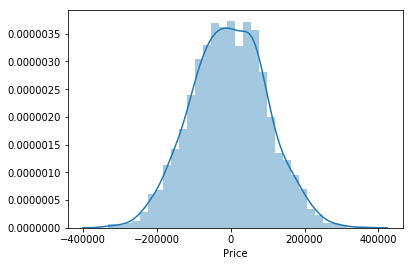

In [37]:
# create a dist of residuals (difference between y_test and predictions)
sns.distplot(y_test - predictions)

Here our residuals appear to be normally distributed. This means that the chosen model was a good choice for the data.

## Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean absolute value of the errors:

$$\frac{1}{n} \sum_{n=1}^{n} |y_{i} - \hat{y}_{i}|$$

**Mean Squared Error** (MSE) is the mean of squared errors:

$$\frac{1}{n} \sum_{n=1}^{n} (y_{i} - \hat{y}_{i})^{2}$$

**Root Mean Squared Error** (RMSE) is the square root mean of squared errors:

$$\sqrt{\frac{1}{n} \sum_{n=1}^{n} (y_{i} - \hat{y}_{i})^{2}}$$

Comparing these metrics:
* **MAE** is the easiest to understand. It is the average error.
* **MSE** is more popular than MAE because MSE punishes larger errors, which tends to be useful in the real world.
* **RMSE** even more popular than MSE, RMSE is interpretable in "y" units.

All of these are **loss functions** which we want to minimize.

In [38]:
from sklearn import metrics

In [39]:
metrics.mean_absolute_error(y_test, predictions)

82288.222519149684

In [40]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209469

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291137

___

## Real World Example

`sci-kit learn` contains a dataset of boston real estate prices from a 1970's study

In [30]:
from sklearn.datasets import load_boston

In [31]:
boston = load_boston()

In [32]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [33]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [42]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [47]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [48]:
df['target'] = pd.Series(boston.target)

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [51]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


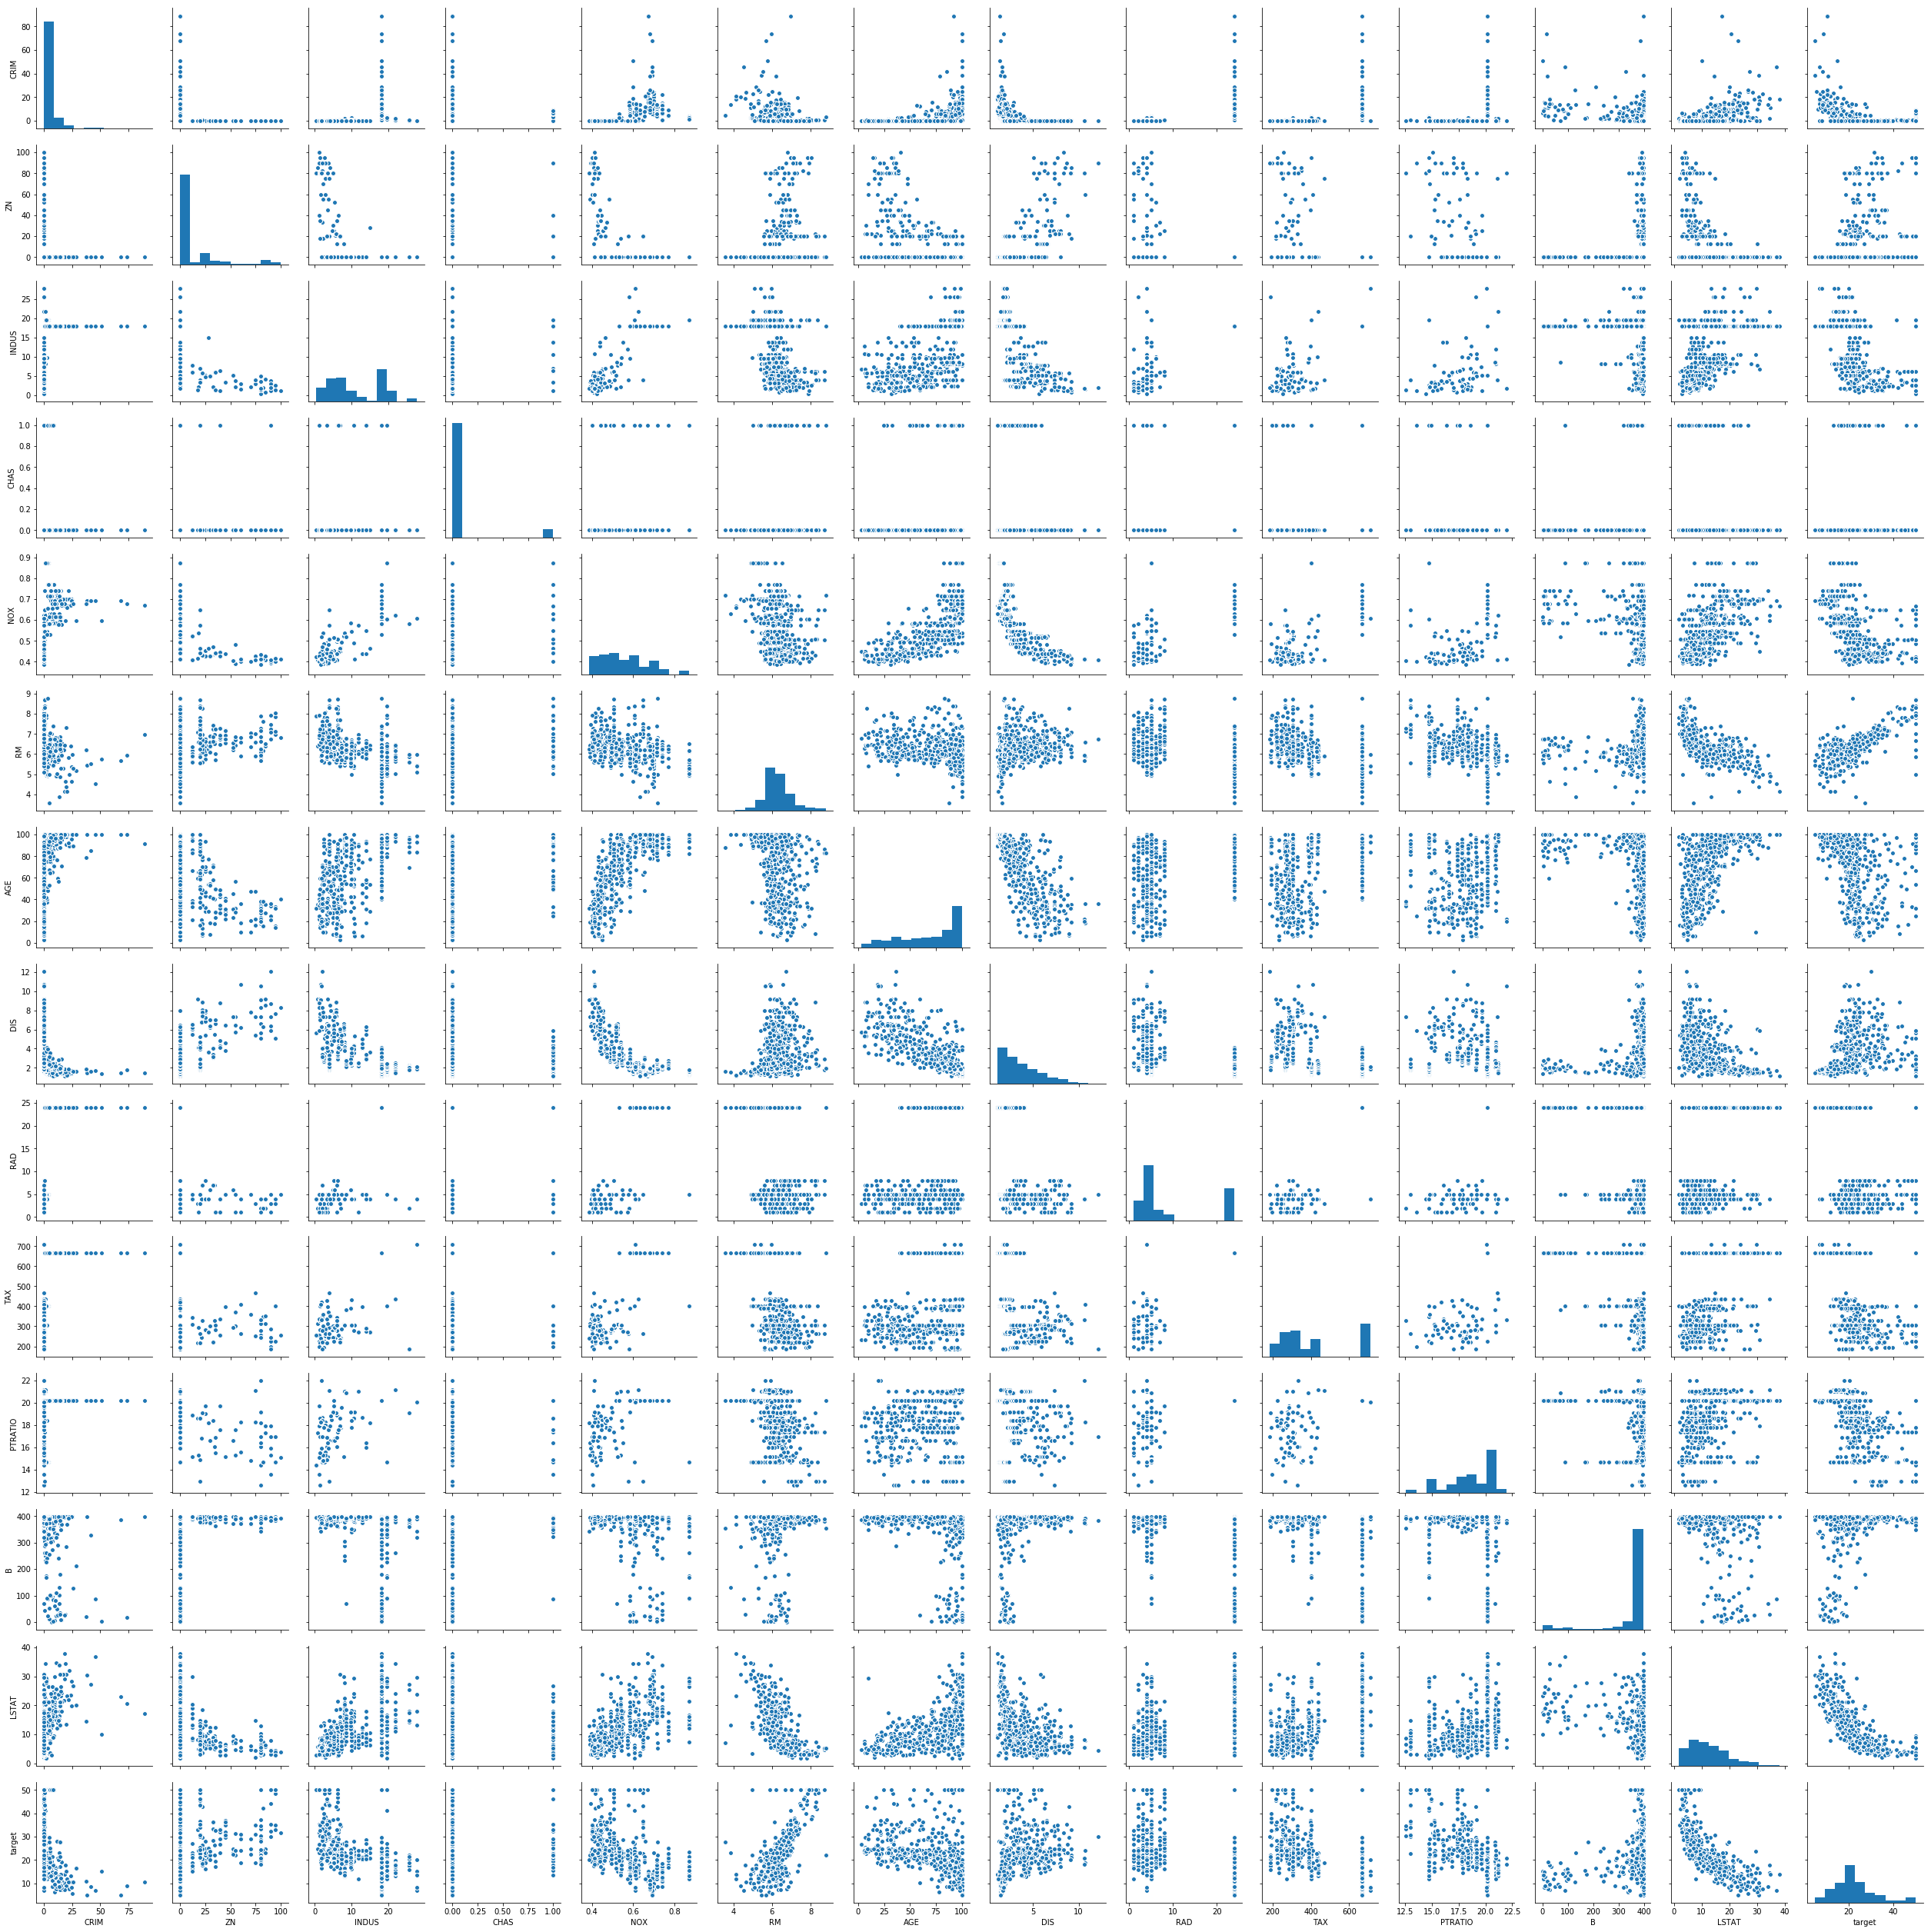

In [52]:
sns.pairplot(df)

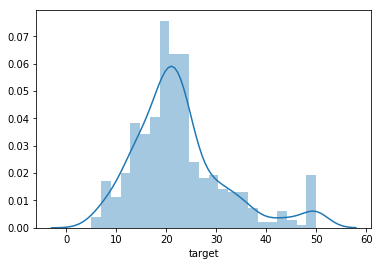

In [54]:
sns.distplot(df['target'])

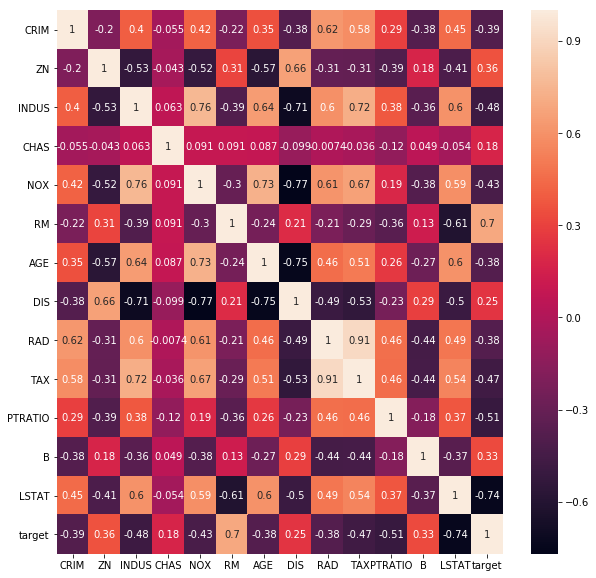

In [57]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [58]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [59]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [60]:
y = df['target']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=101
                                                   )

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print(lm.intercept_)

40.2660512371


In [69]:
lm.coef_

array([ -8.74917163e-02,   5.02793747e-02,   2.06785359e-02,
         3.75457604e+00,  -1.77933846e+01,   3.24118660e+00,
         1.20902568e-02,  -1.40965453e+00,   2.63476633e-01,
        -1.03376395e-02,  -9.52633123e-01,   6.20783942e-03,
        -5.97955998e-01])

In [70]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [71]:
cdf

,Coeff
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


In [72]:
predictions = lm.predict(X_test)

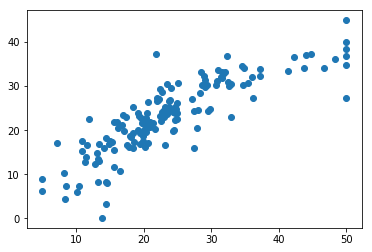

In [73]:
plt.scatter(y_test, predictions)

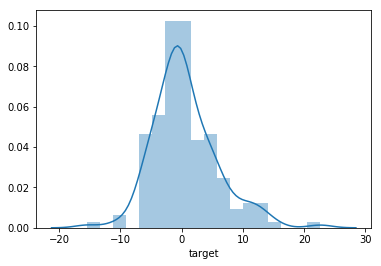

In [74]:
sns.distplot(y_test - predictions)

In [75]:
metrics.mean_absolute_error(y_test, predictions)

3.8365281377279046

In [76]:
metrics.mean_squared_error(y_test, predictions)

28.551148765669513

In [77]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5.3433274993836486